<a href="https://colab.research.google.com/github/Linda-Agesa/Autolib_Analysis/blob/master/Autolib_Car_Sharing_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib Car Sharing Service 

Autolib car sharing company is an electric car sharing service company that manages the public use of its electric plan to users on a subscripption plan.


We are required to answer the following research question in our analysis

- What is the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018?
What is the most popular hour for returning cars?

The folloiwng questions will also aid our analysis:

- What station is the most popular? 

    - Overall?
    - At the most popular hour?
- What postal code is the most popular for picking up Bluecars? Does the most popular station belong to that postal code?
    - Overall?
    - At the most popular picking hour
- Do the results change if you use Utilib and Utilib 1.4 instead of Bluecars?
 


# Loading our Libraries and File




In [0]:
# Loading the libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
# Loading the dataset to our environment

Autolib_cars = pd.read_csv('http://bit.ly/Autolibdataset')
Autolib_cars.head()

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,0,24 Rue Vulpian,3,3,1,0,1,operational,Paris,NaN,paris-vulpian-24,STATION,"48.8310493, 2.3460584",75013,Paris/Vulpian/24,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1,1,8 Boulevard Richard Lenoir,0,0,0,0,1,operational,Paris,NaN,paris-richardlenoir-8,STATION,"48.8545026, 2.370183",75011,Paris/Richard Lenoir/8,operational,NaN,3,station,ok,nonexistent,2018,4,1,0,0
2,2,4 Rue Charles Bossut,3,3,0,0,1,operational,Paris,NaN,paris-charlesbossut-4,STATION,"48.8431847, 2.3837959",75012,Paris/Charles Bossut/4,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
3,3,3 avenue Claude Vellefaux,4,4,0,0,0,operational,Paris,NaN,paris-claudevellefaux-3,STATION,"48.8740623, 2.3703034",75010,Paris/Claude Vellefaux/3,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
4,4,236 Boulevard Voltaire,1,1,0,0,1,operational,Paris,NaN,paris-voltaire-236,STATION,"48.852023, 2.389719",75011,Paris/Voltaire/236,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0


# Data Examination and Cleaning
- In this section we will examine the available data to determine what is relevant for our analysis and what -needs correction before we begin to analyse.

- We will also clean our data by dropping the information that is not needed for our analysis and ensuring the relevant information is in the right format.



In [0]:
#Checking the number of rows and columns in our dataset
Autolib_cars.shape

(14421829, 26)

**Identifying and dealing will duplicate rows in our dataset**

- We will find all the duplicate rows in our dataset and drop them so as to compute the problems and make our conclusion a bit more accurate.

In [0]:
# Then we check for the rows that have duplicate entries in our dataset

Autolib_cars[Autolib_cars.duplicated()]

,Unnamed: 0,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
1119,7,43 Rue de Monceau,0,0,0,0,2,operational,Paris,NaN,paris-monceau-43,STATION,"48.8778333, 2.310832",75008,Paris/Monceau/43,operational,NaN,6,station,ok,nonexistent,2018,4,1,0,0
1120,200,330 rue des PyrÃ©nÃ©es,2,2,0,0,1,operational,Paris,NaN,paris-pyrenees-330,SPACE,"48.8732135, 2.3903853",75020,Paris/PyrÃ©nÃ©es/330,operational,NaN,3,full_station,ok,operational,2018,4,1,0,0
1121,415,28 Avenue de la Porte de Villiers,2,2,0,0,1,operational,Paris,NaN,paris-portedevilliers-28,STATION,"48.8854246, 2.2849721",75017,Paris/Porte de Villiers/28,operational,NaN,4,station,ok,nonexistent,2018,4,1,0,0
1122,425,97 Rue de Charenton,1,1,0,0,0,operational,Paris,NaN,paris-charenton-97,STATION,"48.8476733, 2.377312",75012,Paris/Charenton/97,operational,NaN,2,station,ok,nonexistent,2018,4,1,0,0
1123,503,17 boulevard Saint-Martin,2,2,0,0,0,nonexistent,Paris,NaN,paris-saintmartin-17,STATION,"48.8681421, 2.360276",75003,Paris/Saint-Martin/17,operational,NaN,1,station,ok,nonexistent,2018,4,1,0,0
1124,541,1 rue du PrÃ© Saint Gervais,0,0,0,0,0,nonexistent,Pantin,NaN,pantin-presaintgervais-1,SPACE,"48.890711, 2.4030061",93500,Pantin/PrÃ© Saint Gervais/1,broken,NaN,0,full_station,closed,nonexistent,2018,4,1,0,0
1125,614,118 rue Houdan,5,5,0,0,0,operational,Sceaux,NaN,sceaux-houdan-118,STATION,"48.779037, 2.2891934",92330,Sceaux/Houdan/118,operational,NaN,0,station,ok,nonexistent,2018,4,1,0,0
1126,615,1 rue des Nonnains d'HyÃ¨res,0,0,0,0,1,operational,Paris,NaN,paris-nonnainsdhyeres-1,STATION,"48.85378, 2.358089",75004,Paris/Nonnains d'HyÃ¨res/1,operational,NaN,5,station,ok,nonexistent,2018,4,1,0,0
1127,616,55 avenue de SÃ©gur,0,0,0,0,2,operational,Paris,NaN,paris-segur-55,STATION,"48.8492973, 2.3077697",75007,Paris/SÃ©gur/55,operational,NaN,6,station,ok,nonexistent,2018,4,1,0,0
1128,746,12 Rue Francis de PressensÃ©,3,3,0,1,0,nonexistent,Puteaux,NaN,puteaux-francisdepressense-12,STATION,"48.8761876, 2.2361346",92800,Puteaux/Francis de PressensÃ©/12,operational,NaN,0,station,ok,nonexistent,2018,4,1,0,0


In [0]:
# Dropping the duplicate rows in our dataset
# We will drop all the duplicate rows 
Autolib_cars = Autolib_cars.drop_duplicates()

**Dropping Columns**

- Remove the 'Display comment' and 'Scheduled at' columns as they have too many missing values

- In addition to the dropping those two columns, we drop all other irrelevant including:

   1. Unnamed:

   2. Geo point

   3. Charge Slots

   4. Charging Status

   5. ID

   6. Geo point

   7. Slots

  8. Station type

  9. Year

  10. Month

  11. Day
  
  12. Minute

In [0]:
# Dropping the mentioned columns
Autolib_cars.drop(['Unnamed: 0','Displayed comment', 'Charge Slots', 'Charging Status', 'ID', 'Geo point',
                                  'Scheduled at', 'Slots', 'Station type', 'year', 'month', 'day', 'minute'], axis = 1, inplace = True)

Autolib_cars.head()


,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Status,Subscription status,hour
0,24 Rue Vulpian,3,3,1,0,Paris,STATION,75013,Paris/Vulpian/24,operational,ok,nonexistent,0
1,8 Boulevard Richard Lenoir,0,0,0,0,Paris,STATION,75011,Paris/Richard Lenoir/8,operational,ok,nonexistent,0
2,4 Rue Charles Bossut,3,3,0,0,Paris,STATION,75012,Paris/Charles Bossut/4,operational,ok,nonexistent,0
3,3 avenue Claude Vellefaux,4,4,0,0,Paris,STATION,75010,Paris/Claude Vellefaux/3,operational,ok,nonexistent,0
4,236 Boulevard Voltaire,1,1,0,0,Paris,STATION,75011,Paris/Voltaire/236,operational,ok,nonexistent,0


In [0]:
Autolib_cars.tail()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,City,Kind,Postal code,Public name,Rental status,Status,Subscription status,hour
14421810,21 rue de l'Ecole de Medecine,0,0,0,0,Paris,PARKING,75006,Paris/Ecole de Medecine/21,future,scheduled,nonexistent,23
14421811,6 avenue de la Porte de Champerret,4,4,0,0,Paris,PARKING,75017,Paris/Porte de Champerret/6,operational,ok,nonexistent,23
14421812,194 rue de fontenay,6,6,0,0,Vincennes,STATION,94300,Vincennes/Fontenay/194,operational,ok,nonexistent,23
14421813,102 Boulevard Raymond PoincarÃ©,2,2,0,0,Garches,STATION,92380,Garches/Raymond PoincarÃ©/102,operational,ok,nonexistent,23
14421814,8 avenue George Sand,0,0,0,0,Saint-Denis,STATION,93200,Saint-Denis/George Sand/8,operational,ok,nonexistent,23


In [0]:
# We are checking the various types of subscription status and rental status available
print(Autolib_cars['Subscription status'].unique())
print(Autolib_cars['Rental status'].unique())


['nonexistent' 'operational' 'broken']
['operational' 'broken' 'future' 'nonexistent']


In [0]:
#We examine the kinds of stations we have and the status of the stations
print(Autolib_cars['Kind'].unique())
print(Autolib_cars['Status'].unique())

['STATION' 'SPACE' 'PARKING' 'CENTER']
['ok' 'closed' 'scheduled']


In [0]:
Autolib_cars.shape

(14278939, 13)

In [0]:
# In this line of code, we will change all the column names to lowercase.
# We then replace the space between two words with an underscore.
# We also replace remov the dot in utilib_1.4_counter.
# Finally we will strip the whitespaces in our column names.
Autolib_cars.columns = Autolib_cars.columns.str.lower().str.replace(' ', '_').str.replace('.', '').str.strip()

In [0]:
# Displaying the column names
Autolib_cars.columns

Index(['address', 'cars', 'bluecar_counter', 'utilib_counter',
       'utilib_14_counter', 'city', 'kind', 'postal_code', 'public_name',
       'rental_status', 'status', 'subscription_status', 'hour'],
      dtype='object')

In [0]:
#Checking for null values in our dataframe

Autolib_cars.isnull().sum()

address                0
cars                   0
bluecar_counter        0
utilib_counter         0
utilib_14_counter      0
city                   0
kind                   0
postal_code            0
public_name            0
rental_status          0
status                 0
subscription_status    0
hour                   0
dtype: int64

Text(0, 0.5, 'Bluecars')

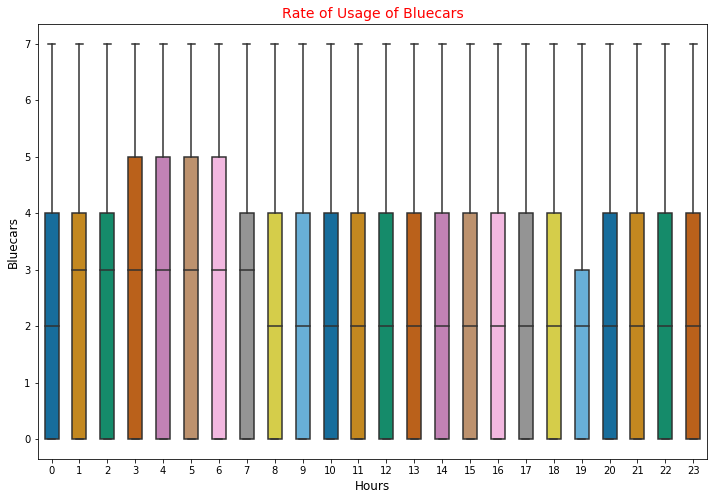

In [0]:
#Checking for outliers

plt.figure(figsize= (12,8))
bplot = sns.boxplot(y = 'bluecar_counter', x = 'hour', data = Autolib_cars, width = 0.5, palette= 'colorblind')
bplot.axes.set_title('Comparison of the IQR Per Hour', fontsize = 14, color = 'r')
bplot.set_xlabel('Hours', fontsize = 12)
bplot.set_ylabel('Bluecars', fontsize = 12)

In [0]:
plt.figure(figsize= (12,8))
ut_plot = sns.boxplot(y = 'utilib_counter', x = 'hour', data = Autolib_cars, width = 0.5, palette= 'colorblind')
ut_plot.axes.set_title('Rate of Usage of Utilib Cars', fontsize = 14, color = 'b')
ut_plot.set_xlabel('Hours', fontsize = 12)
ut_plot.set_ylabel('Utilib', fontsize = 12)

In [0]:
plt.figure(figsize= (12,8))
u_plot = sns.boxplot(y = 'utilib_14_counter', x = 'hour', data = Autolib_cars, width = 0.5, palette= 'colorblind')
u_plot.axes.set_title('Rate of Usage of Bluecars', fontsize = 14, color = 'r')
u_plot.set_xlabel('Hours', fontsize = 12)
u_plot.set_ylabel('Utilib_14', fontsize = 12)

Text(0.5, 1.0, 'Bluecars counter boxplot')

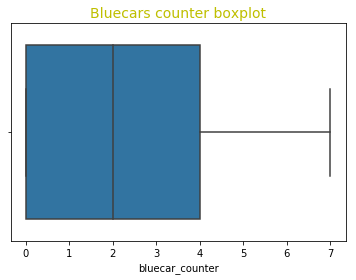

In [0]:
#Plotting a boxplot for the Bluecar counter
bplot = sns.boxplot(Autolib_cars.bluecar_counter)
bplot.axes.set_title('Bluecars counter boxplot', fontsize = 14, color = 'y')

Text(0.5, 1.0, 'Utilib Counter Boxplot')

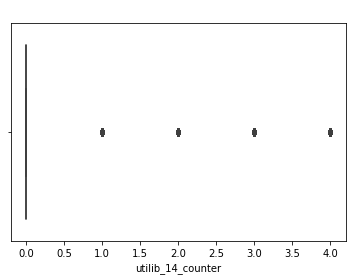

In [0]:
# Boxplot for the Utilib counter 
ut_plot = sns.boxplot(Autolib_cars.utilib_14_counter)
ut_plot.axes.set_title('Utilib Counter Boxplot', fontsize = 14, color = 'w')

Text(0.5, 1.0, 'Utilib 1.4 Counter Boxplot')

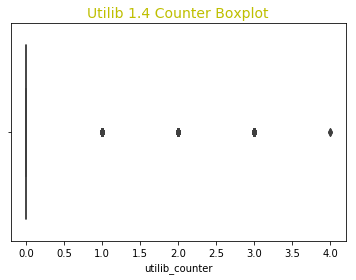

In [0]:
#We plot the boxplot of the Utilib 1.4 Counter
util_plot = sns.boxplot(Autolib_cars.utilib_counter)
util_plot.axes.set_title('Utilib 1.4 Counter Boxplot', fontsize = 14, color = 'y')

In [0]:
#Creating a column that sums the all counter values succuessively

Autolib_cars['joint_counter'] = Autolib_cars.apply(lambda row: row['bluecar_counter'] + row['utilib_counter'] + row['utilib_14_counter'], axis = 1)

Autolib_cars.head(10)

,address,cars,bluecar_counter,utilib_counter,utilib_14_counter,city,kind,postal_code,public_name,rental_status,status,subscription_status,hour,joint_counter
0,24 Rue Vulpian,3,3,1,0,Paris,STATION,75013,Paris/Vulpian/24,operational,ok,nonexistent,0,4
1,8 Boulevard Richard Lenoir,0,0,0,0,Paris,STATION,75011,Paris/Richard Lenoir/8,operational,ok,nonexistent,0,0
2,4 Rue Charles Bossut,3,3,0,0,Paris,STATION,75012,Paris/Charles Bossut/4,operational,ok,nonexistent,0,3
3,3 avenue Claude Vellefaux,4,4,0,0,Paris,STATION,75010,Paris/Claude Vellefaux/3,operational,ok,nonexistent,0,4
4,236 Boulevard Voltaire,1,1,0,0,Paris,STATION,75011,Paris/Voltaire/236,operational,ok,nonexistent,0,1
5,44 Rue des Pirogues de Bercy,1,1,0,0,Paris,STATION,75012,Paris/Pirogues de Bercy/44,operational,ok,nonexistent,0,1
6,63 Boulevard Richard Lenoir,1,1,0,0,Paris,STATION,75011,Paris/Richard Lenoir/63,operational,ok,nonexistent,0,1
7,43 Rue de Monceau,0,0,0,0,Paris,STATION,75008,Paris/Monceau/43,operational,ok,nonexistent,0,0
8,10 Avenue du Docteur Arnold Netter,4,4,0,0,Paris,STATION,75012,Paris/Arnold Netter/10,operational,ok,nonexistent,0,4
9,33 Avenue Pierre 1er de Serbie,2,2,0,0,Paris,STATION,75016,Paris/Pierre 1er de Serbie/33,operational,ok,nonexistent,0,2


# Data Analysis

# Objective 1

**a. What is the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018?**


In [0]:
#Finding the difference of the sum of the number of cars per hour in all the 9 days in ascending order

model = 'bluecar_counter'

Autolib_paris = Autolib_cars[Autolib_cars.city == 'Paris'].groupby(['hour'])[model].sum().diff().sort_values(ascending = True)

Autolib_paris.head()


hour
23   -54291.0
8    -47442.0
12   -37511.0
19   -17996.0
7    -15328.0
Name: bluecar_counter, dtype: float64

**b. What is  the most popular hour for picking up Utilib cars in Paris over the 9 days perid??**

In [0]:
#Investigating the average most popular hour for picking a utilib car in Paris
Autolib_paris = Autolib_cars[Autolib_cars.city == 'Paris'].groupby(['hour'])['utilib_counter'].sum().diff().sort_values(ascending = True)

Autolib_paris.head()

hour
12   -1811.0
23   -1166.0
17   -1133.0
15   -1037.0
9     -852.0
Name: utilib_counter, dtype: float64

**c. What hour was the most popular for picking up a Utilib 1.4 car in Paris?**

In [0]:
# Finding out the most popular hour for picking up a Utilib 1.4 in Paris
Autolib_paris = Autolib_cars[Autolib_cars.city == 'Paris'].groupby(['hour'])['utilib_14_counter'].sum().diff().sort_values(ascending = True)

Autolib_paris.head()

hour
23   -3376.0
12   -2892.0
15   -2119.0
19   -1489.0
11   -1176.0
Name: utilib_14_counter, dtype: float64

**d. Most popular hour for picking up any car overall?**

In [0]:
#We investigate to find the hour of the day when most cars are picked up in general
Autolib_general= Autolib_cars.groupby(['hour'])['joint_counter'].sum().diff().sort_values(ascending = True)

Autolib_general.head()

hour
8    -103076.0
23    -99307.0
12    -69546.0
7     -53451.0
18    -48483.0
Name: joint_counter, dtype: float64

# Objective 2

**a. What is the most popular hour for returning Bluecars?**

In [0]:
#Now let us find the most popular hour for returning the Bluecars

Return_autolib = Autolib_cars.groupby(['hour'])['bluecar_counter'].sum().diff().sort_values(ascending = False)

Return_autolib.head()

hour
2     199946.0
21    113492.0
20     70827.0
1      44660.0
3      34183.0
Name: bluecar_counter, dtype: float64

**b. What hour is the most popular for returning Utilib cars over the given period?**

In [0]:
#Return_autolib = Autolib_cars.groupby(['hour'])['utilib_counter'].sum().diff().sort_values(ascending = False)

Return_autolib.head()

hour
2     5583.0
21    2513.0
20    1395.0
1     1047.0
13     577.0
Name: utilib_counter, dtype: float64

**c. What was the most popular hour for returning Utilib 1.4 cars?**

In [0]:
#Investigating the most popular hour for returning the utilib 1.4 cars
Return_autolib = Autolib_cars.groupby(['hour'])['utilib_14_counter'].sum().diff().sort_values(ascending = False)

Return_autolib.head()

hour
2     11615.0
21     5427.0
20     4158.0
3      1725.0
1      1071.0
Name: utilib_14_counter, dtype: float64

# Objective 3

**a. What station is the most popular overall?**

In [0]:
#Identifying the most popular station
Pop_station = Autolib_cars[(Autolib_cars.kind == 'STATION') & (Autolib_cars['subscription_status'] == 'operational') & (Autolib_cars.status == 'ok') & (Autolib_cars.hour == 8)].groupby(['public_name'])['joint_counter'].sum().diff().sort_values(ascending = True)

Pop_station

public_name
Meudon/Jean JaurÃ¨s/72            -1227.0
Villeneuve-la-Garenne/Verdun/30    1632.0
Garches/De Gaulle/168                 NaN
Name: joint_counter, dtype: float64

**b. Most popular station for picking a Bluecar at the most popular hour for picking a Bluecar**

In [0]:
#Identifying the most popular station to pick up a Bluecar at the most popular hour
Pop_station = Autolib_cars[(Autolib_cars.kind == 'STATION') & (Autolib_cars['subscription_status'] == 'operational') & (Autolib_cars.status == 'ok') & (Autolib_cars.hour == 23)].groupby(['public_name'])['bluecar_counter'].sum().diff().sort_values(ascending = True)

Pop_station

public_name
Meudon/Jean JaurÃ¨s/72            -771.0
Villeneuve-la-Garenne/Verdun/30    587.0
Garches/De Gaulle/168                NaN
Name: bluecar_counter, dtype: float64

# Objective 4

**a.**

**i) What postal code is the most popular for picking up Bluecars overall?**

**ii) Does the most popular station belong to that postal code?**
      

In [0]:
#identifying the most popular postal code in general for picking up a Bluecar
Pop_postal = Autolib_cars[(Autolib_cars['bluecar_counter'] > 0)].groupby(['postal_code'])['postal_code'].count().sort_values(ascending = False)

Pop_postal.head()

postal_code
75015    560526
75016    514971
75017    424793
92000    391794
75020    385461
Name: postal_code, dtype: int64

In [0]:
# Finding out if the most popular station for picking up a Bluecar belongs to the most popular postal code

Autolib_cars.loc[Autolib_cars['public_name'] == 'Meudon/Jean JaurÃ¨s/72'].head(1)

,address,cars,bluecar_counter,utilib_counter,utilib_14_counter,city,kind,postal_code,public_name,rental_status,status,subscription_status,hour,joint_counter
1116,72 Avenue Jean JaurÃ¨s,3,3,0,0,Meudon,STATION,92190,Meudon/Jean JaurÃ¨s/72,operational,ok,broken,0,3


**b. What postal code is the most popular for picking up Bluecars at the most popular picking hour?**

In [0]:
#Finding the most popular postal code for picking up a Bluecar at the most popular picking hour
pop_postal = Autolib_cars[(Autolib_cars['bluecar_counter'] > 0) & (Autolib_cars.hour == 23)].groupby(['postal_code'])['bluecar_counter'].sum().diff().sort_values(ascending = True)
pop_postal.head()

postal_code
75112   -58443.0
92100   -39118.0
94100   -28397.0
92800   -21671.0
92160   -19317.0
Name: bluecar_counter, dtype: float64